In [1]:
%load_ext autoreload
%autoreload 2
import all_function_defs as f
import cobra



In [7]:
# All fluxes to excel

# path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\All_simulated_fluxes\\rhto-GEM\\rhto-GEM_all_fluxes_biomass_max.xlsx"
# f.all_fluxes_to_excel(path, rhtoGEM_all_fluxes_bm)

# path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\All_simulated_fluxes\\rhto-GEM\\rhto-GEM_all_fluxes_NGAM_min.xlsx"
# f.all_fluxes_to_excel(path, rhtoGEM_all_fluxes_nm)

### BIOMASS MAXIMISATION

In [2]:
# Get all fluxes over five rates and make a df

model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml"
# model_path = f'C:\\Users\\Maive\\Downloads\\rhto-GEM-1.3.0\\ModelFiles\\xml\\rhto.xml'
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

biomass_rxn_ID = "r_4041"   
glc_ID = 'r_1714'

rhtoGEM_all_fluxes_bm = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)
rhtoGEM_all_fluxes_bm


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,r_0013,r_0014,...,y300064,y300065,y300066,y300068,y300069,y300070,y300072,y300074,y300075,y300078
0,0.0,0.0,0.0,0.0,0.033107,0.011059,0.001663,0.0,0.0,0.00003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.089936,0.030041,0.004518,0.0,0.0,0.000083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.137501,0.045928,0.006907,0.0,0.0,0.000126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.196022,0.065476,0.009846,0.0,0.0,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266835,0.089129,0.013404,0.0,0.0,0.000245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
growth_rates = rhtoGEM_all_fluxes_bm[biomass_rxn_ID] 
growth_rates 

0    0.030702
1    0.083402
2    0.127511
3     0.18178
4    0.247448
Name: r_4041, dtype: object

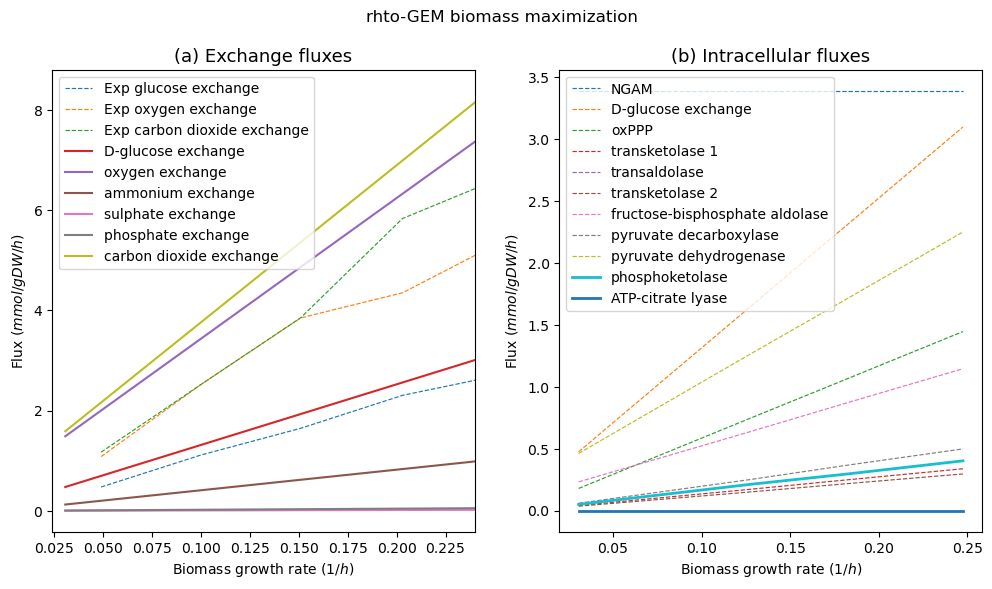

In [5]:
# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['r_1714', 'r_1992', 'r_1654','r_2060','r_2005', 'r_1672']
exchange_fluxes = f.metabolites_fluxes(model_path, rhtoGEM_all_fluxes_bm, exchange_metabolites)

intracellular_metabolites = ['r_4046' ,'r_1714', 'r_0466', 'r_1049', 'r_1048','r_1050', 'r_0450','r_0959','r_0961']
intracellular_fluxes = f.metabolites_fluxes(model_path, rhtoGEM_all_fluxes_bm, intracellular_metabolites)

phosphoketolase_ACL = ['t_0081', 'y200003']
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, rhtoGEM_all_fluxes_bm, phosphoketolase_ACL)

title = 'rhto-GEM biomass maximization'
fig = f.plot_ex_intr_fluxes(rhtoGEM_all_fluxes_bm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_biomass_max.png")

In [6]:
intracellular_fluxes

,NGAM,D-glucose exchange,oxPPP,transketolase 1,transaldolase,transketolase 2,fructose-bisphosphate aldolase,pyruvate decarboxylase,pyruvate dehydrogenase
0,3.3928,-0.476,0.179929,0.041736,0.0,0.036539,0.233055,0.060669,0.463124
1,3.3928,-1.114,0.488772,0.113377,0.0,0.09926,0.454047,0.164815,0.899965
2,3.3928,-1.648,0.747272,0.173339,0.0,0.151757,0.639013,0.251983,1.265597
3,3.3928,-2.305,1.063415,0.249012,0.0,0.218244,0.870382,0.366823,1.709753
4,3.3928,-3.1,1.447575,0.338968,0.0,0.297085,1.147125,0.499339,2.252036


In [7]:
phosphoketolase_ACL_fluxes

,phosphoketolase,ATP-citrate lyase
0,0.051292,0.0
1,0.139326,0.0
2,0.213012,0.0
3,0.296075,0.0
4,0.403032,0.0


COFACTOR balances

In [8]:
# Cofactor lists
nadphs = ['s_1212', 's_1213', 's_1214', 's_1215', 's_2799','s_2952']
nadhs = ['s_1203', 's_1204', 's_1205', 's_1206', 's_1206', 's_3753']
atps = ['s_0434', 's_0435', 's_0437', 's_3881', 's_0438', 's_0439', 's_3359', 's_2840', 's_2831', 's_2856', 's_3341'] 

i1 = 0
i2 = 4

SUM produced: 0.3932994473877962, SUM consumed: -0.39329944738779626
SUM produced: 3.169873231565297, SUM consumed: -3.1698732315652967


([<matplotlib.patches.Wedge at 0x149ad3cb2c0>,
 [Text(1.0993634371239704, 0.03741701638252397, '2.2% Other producing (0.07)'),
  Text(0.776839303464592, 0.7787943865954915, '45.7% glucose 6-phosphate dehydrogenase (1.45)'),
  Text(-0.03741701638252386, 1.0993634371239704, '6.3% methylenetetrahydrofolate dehydrogenase (NADP) (0.2)'),
  Text(-0.8279930691813703, 0.7241736514038706, '45.7% phosphogluconate dehydrogenase (1.45)'),
  Text(-1.071823104326062, -0.2473767026881148, '14.4% Other consuming (-0.46)'),
  Text(-0.9652022315778198, -0.5276216941684608, '3.0% acetohydroxy acid isomeroreductase (-0.09)'),
  Text(-0.5858796241071321, -0.9309914425257011, '29.4% glutamate dehydrogenase (NADP) (-0.93)'),
  Text(-0.06287568631389136, -1.0982015516609678, '2.7% N-acetyl-g-glutamyl-phosphate reductase (-0.09)'),
  Text(0.12807700071719288, -1.0925183210762592, '8.4% fatty-acyl-CoA synthase (n-C16:0CoA) (-0.27)'),
  Text(0.868157079380023, -0.6755022468669876, '42.1% fatty-acyl-CoA synthase 

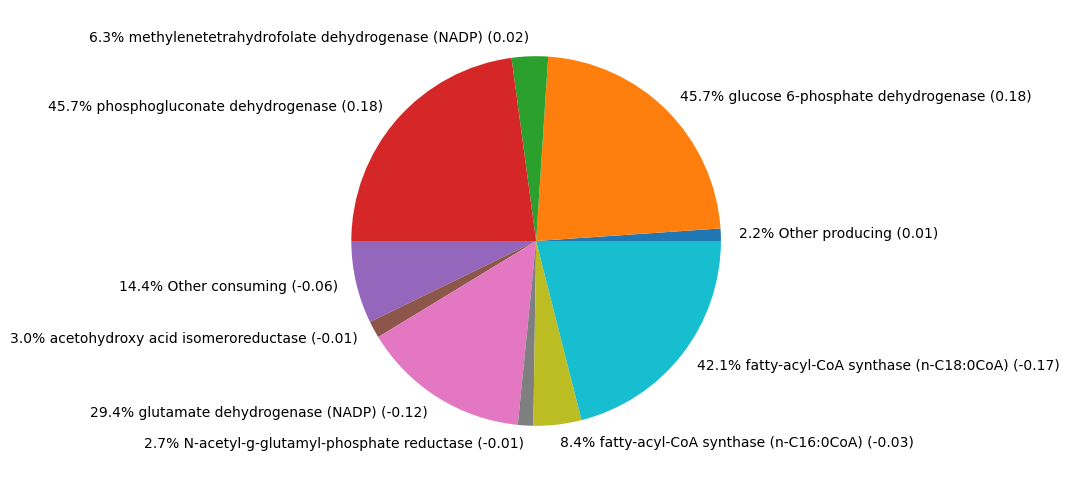

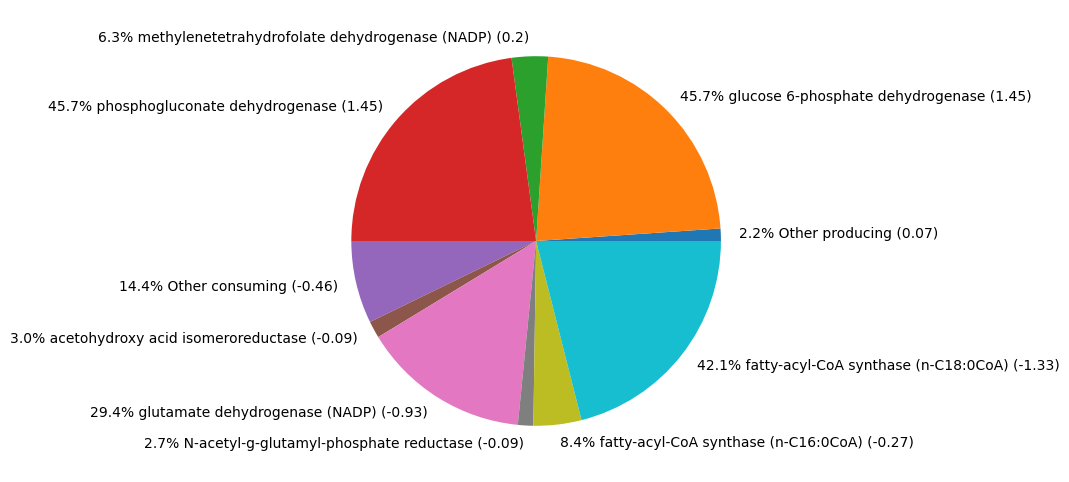

In [9]:
nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_bm_NADPH.png")

nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_bm_NADPH_max.png")

pie_nadph_fluxes_0
pie_nadph_fluxes_4


# # No difs on any GR
# nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

# pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# # #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH.png")

# # See on all GR
# nadph_fluxes_1 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 1, biomass_rxn_ID, glc_ID)
# nadph_fluxes_2 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 2, biomass_rxn_ID, glc_ID)
# nadph_fluxes_3 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 3, biomass_rxn_ID, glc_ID)

# pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
# pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)
# pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3)

# nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# # #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH_max.png")

SUM produced: 3.2716714977963197, SUM consumed: -3.2716714977963197
SUM produced: 17.531696578782938, SUM consumed: -17.531696578782938


([<matplotlib.patches.Wedge at 0x149a2376270>,
 [Text(1.0972188383945043, 0.07817173832156234, '4.5% Other producing (0.79)'),
  Text(0.9811336195556319, 0.4973699031683207, '20.8% glyceraldehyde-3-phosphate dehydrogenase (3.65)'),
  Text(0.6239371871994268, 0.9059262588255557, '10.9% glycine-cleavage complex (lipoamide) (1.91)'),
  Text(0.2662917793069112, 1.0672809790648194, '11.9% isocitrate dehydrogenase (NAD+) (2.09)'),
  Text(-0.5373576993031728, 0.9598159735072141, '36.2% malate dehydrogenase (6.34)'),
  Text(-1.0540374725439403, 0.3146506101586052, '12.9% pyruvate dehydrogenase (2.26)'),
  Text(-1.098944394339749, 0.048179021879265094, '2.8% acetaldehyde dehydrogenase (0.49)'),
  Text(-1.09977016781538, -0.02248506133705736, '1.3% Other consuming (-0.23)'),
  Text(-0.9950508648828654, -0.4689070017560642, '25.4% malate dehydrogenase, cytoplasmic (-4.46)'),
  Text(0.4484691984887719, -1.0044278859165743, '73.3% NADH dehydrogenase (complex I) (-12.84)')])

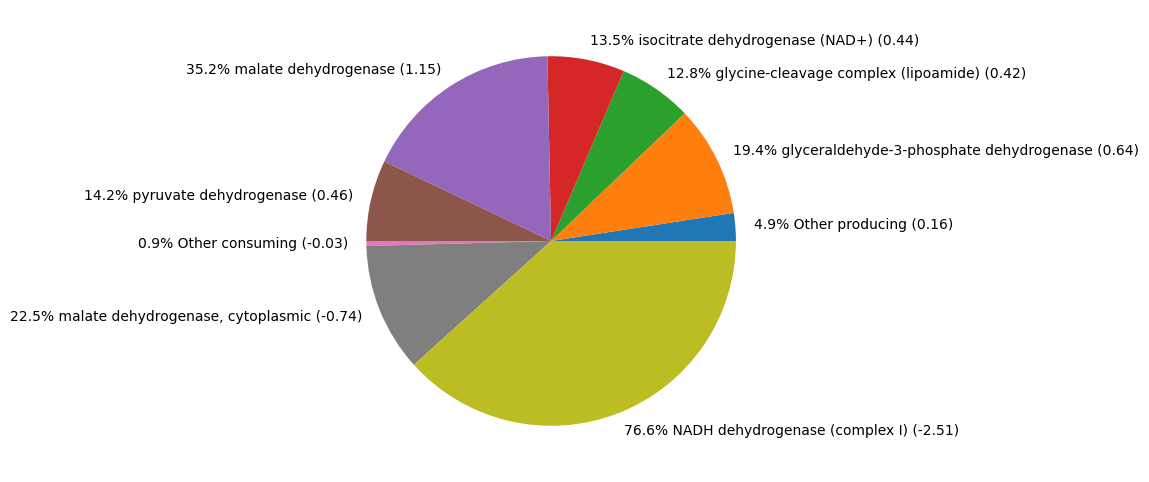

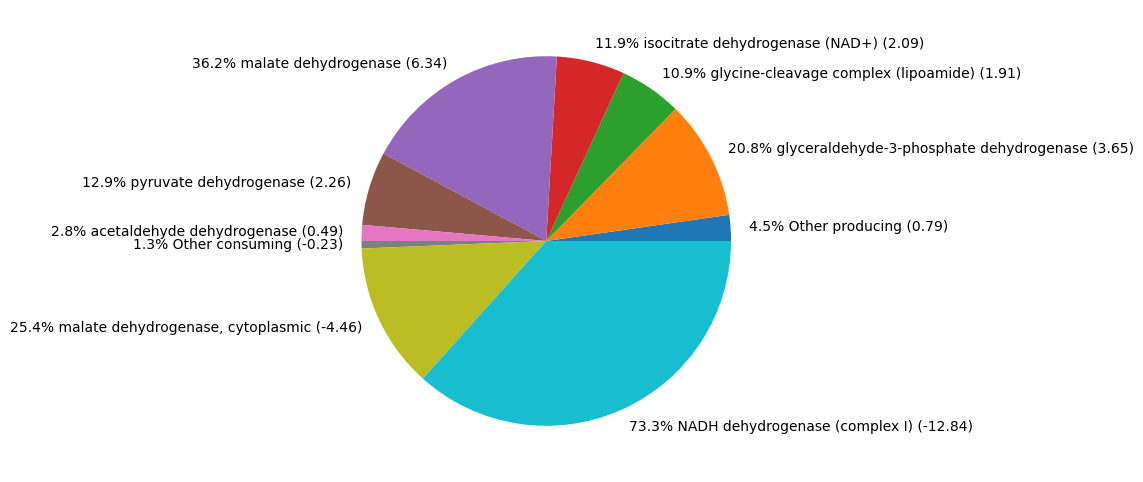

In [10]:
nadh_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_bm_NADH.png")

nadh_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_bm_NADH_4.png")

pie_nadh_fluxes_0 
pie_nadh_fluxes_4

SUM produced: 8.815819758881732, SUM consumed: -8.815819758881728
SUM produced: 45.627831148790314, SUM consumed: -45.62783114879031


([<matplotlib.patches.Wedge at 0x149ad665ee0>,
 [Text(1.0999729084373366, 0.007720149215298765, '0.4% Other producing (0.2)'),
  Text(0.32413231468092496, 1.0511604266616899, '80.1% ATP synthase (36.53)'),
  Text(-0.9723045033265728, 0.514416128062551, '8.0% phosphoglycerate kinase (3.65)'),
  Text(-1.066768677358327, 0.2683367082737018, '7.3% pyruvate kinase (3.33)'),
  Text(-1.097610732224525, 0.07246157951316096, '4.2% succinate-CoA ligase (ADP-forming) (1.91)'),
  Text(-1.0864936869598436, -0.17184722341779568, '10.0% Other consuming (-4.56)'),
  Text(-1.0295059886368734, -0.38744989270977254, '2.9% adenylate kinase (-1.34)'),
  Text(-0.9584652495080512, -0.539763249476536, '6.8% hexokinase (D-glucose:ATP) (-3.1)'),
  Text(-0.8697189151271078, -0.6734901696907885, '2.5% phosphofructokinase (-1.14)'),
  Text(0.25325418098191044, -1.070449587703775, '70.3% biomass pseudoreaction (-32.09)'),
  Text(1.092505015748784, -0.12819044646052813, '7.4% non-growth associated maintenance reacti

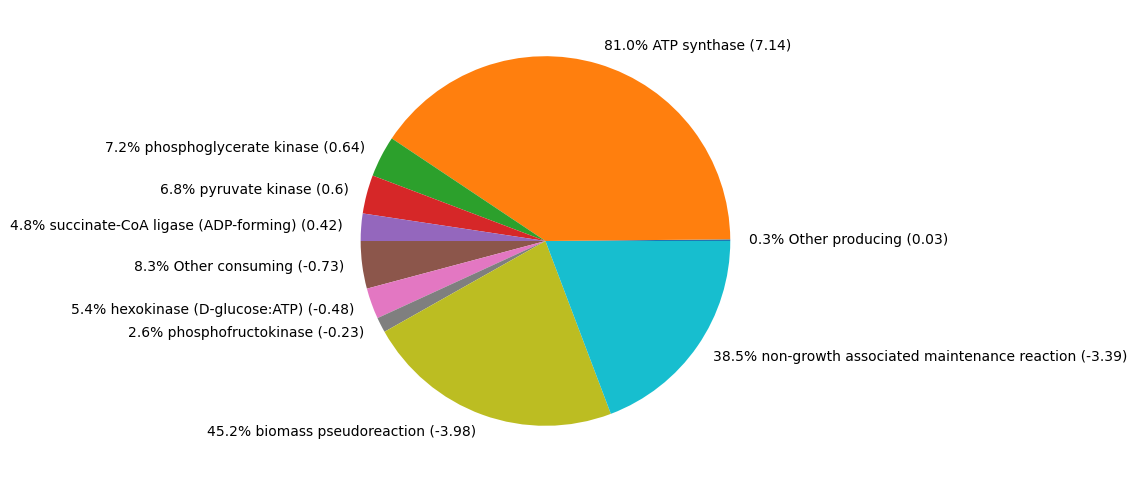

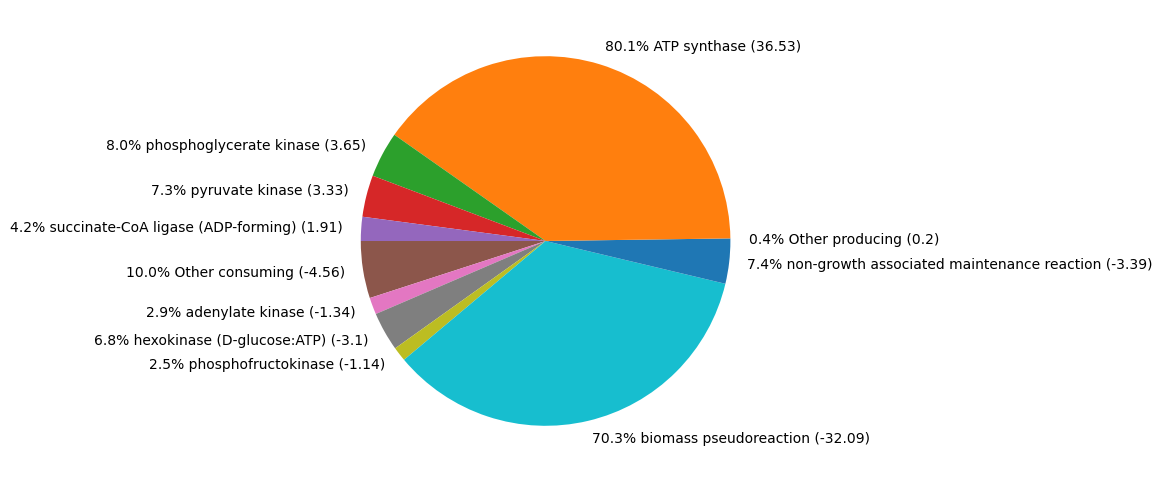

In [11]:
atp_fluxes_0 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_bm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_bm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

### NGAM minimisation

In [4]:
# growth_rates = 
NGAM_rxn_ID = "r_4046"

rhtoGEM_all_fluxes_nm = f.all_fluxes_NGAM_min_df(model_path, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID)

exchange_fluxes = f.metabolites_fluxes(model_path, rhtoGEM_all_fluxes_nm, exchange_metabolites)
intracellular_fluxes = f.metabolites_fluxes(model_path, rhtoGEM_all_fluxes_nm, intracellular_metabolites)
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, rhtoGEM_all_fluxes_nm, phosphoketolase_ACL)

title = 'rhto-GEM NGAM minimization'
fig = f.plot_ex_intr_fluxes(rhtoGEM_all_fluxes_nm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_NGAM_min.png")


NameError: name 'exchange_metabolites' is not defined

COFACTOR balances

SUM produced: 0.39329944738782086, SUM consumed: -0.39329944738779266
SUM produced: 3.169873231565265, SUM consumed: -3.169873231565265


([<matplotlib.patches.Wedge at 0x1d5166548c0>,
 [Text(1.0993634371239704, 0.03741701638252397, '2.2% Other producing (0.07)'),
  Text(0.776839303464592, 0.7787943865954915, '45.7% glucose 6-phosphate dehydrogenase (1.45)'),
  Text(-0.03741701638252386, 1.0993634371239704, '6.3% methylenetetrahydrofolate dehydrogenase (NADP) (0.2)'),
  Text(-0.8279930691813703, 0.7241736514038706, '45.7% phosphogluconate dehydrogenase (1.45)'),
  Text(-1.071823104326062, -0.2473767026881148, '14.4% Other consuming (-0.46)'),
  Text(-0.9652022315778198, -0.5276216941684608, '3.0% acetohydroxy acid isomeroreductase (-0.09)'),
  Text(-0.5858796241071321, -0.9309914425257011, '29.4% glutamate dehydrogenase (NADP) (-0.93)'),
  Text(-0.06287568631389136, -1.0982015516609678, '2.7% N-acetyl-g-glutamyl-phosphate reductase (-0.09)'),
  Text(0.12807700071719288, -1.0925183210762592, '8.4% fatty-acyl-CoA synthase (n-C16:0CoA) (-0.27)'),
  Text(0.868157079380023, -0.6755022468669876, '42.1% fatty-acyl-CoA synthase 

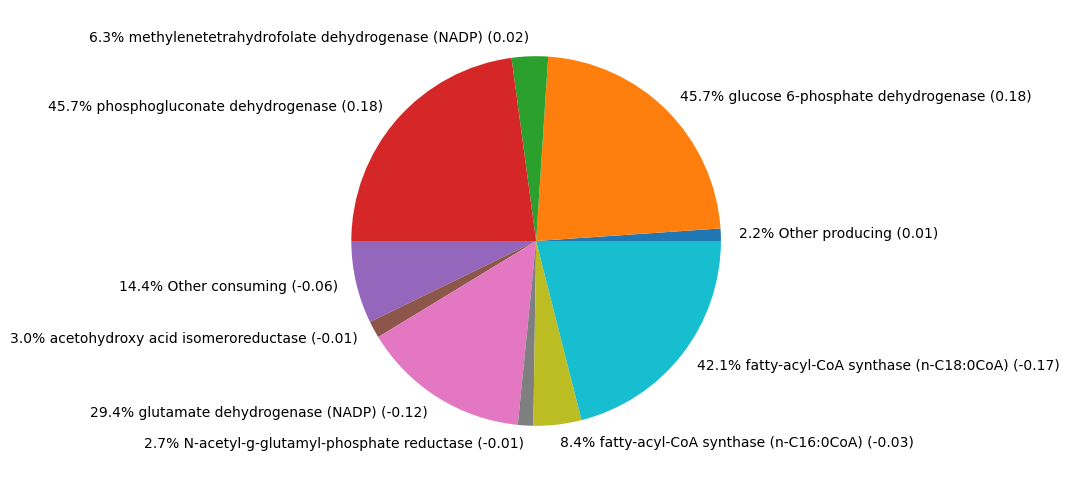

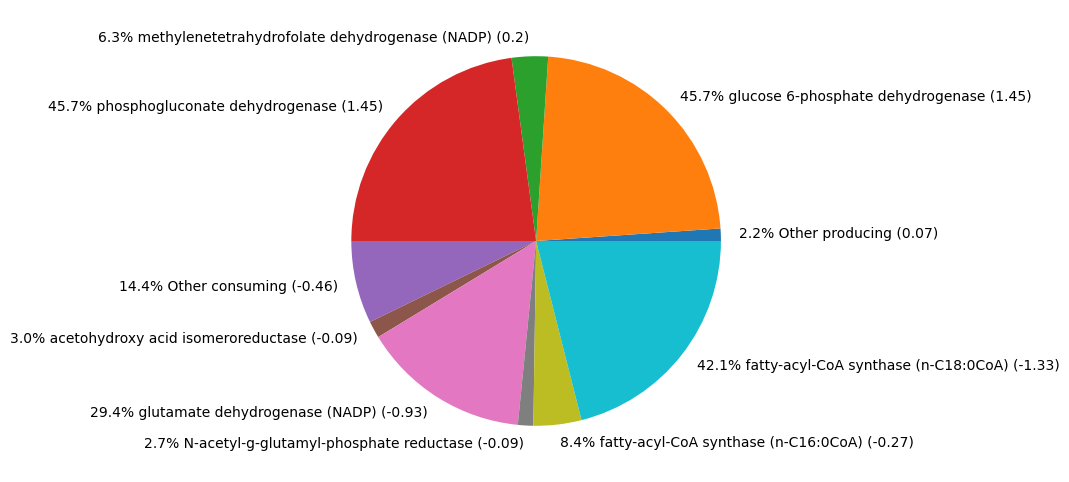

In [ ]:
NGAM_rxn_ID = "r_4046"

nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_nm_NADPH.png")

nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_nm_NADPH_max.png")

pie_nadph_fluxes_0
pie_nadph_fluxes_4

# # No differences in any GRs
# nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

# pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# # #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH.png")

# nadph_fluxes_1 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 1)
# pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
 
# nadph_fluxes_2 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 2)
# pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)

# nadph_fluxes_3 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 3)
# pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3) 

# nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# # #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH_max.png")

SUM produced: 3.2716714977961683, SUM consumed: -3.271671497796345
SUM produced: 17.531696578783198, SUM consumed: -17.531696578783194


([<matplotlib.patches.Wedge at 0x1ccf0b636b0>,
 [Text(1.0927420512388855, 0.12615391176746318, '7.3% Other producing (1.28)'),
  Text(0.9338423922080222, 0.58132468252707, '20.8% glyceraldehyde-3-phosphate dehydrogenase (3.65)'),
  Text(0.542261971494131, 0.9570537885987905, '10.9% glycine-cleavage complex (lipoamide) (1.91)'),
  Text(0.17186793234701497, 1.0864904112925995, '11.9% isocitrate dehydrogenase (NAD+) (2.09)'),
  Text(-0.6192934615251162, 0.9091070390840891, '36.2% malate dehydrogenase (6.34)'),
  Text(-1.0775297971199447, 0.22120021771836287, '12.9% pyruvate dehydrogenase (2.26)'),
  Text(-1.0997701680785303, -0.022485048466067706, '1.3% Other consuming (-0.23)'),
  Text(-0.9950508703706455, -0.46890699011064113, '25.4% malate dehydrogenase, cytoplasmic (-4.46)'),
  Text(0.44846918673360675, -1.0044278911651636, '73.3% NADH dehydrogenase (complex I) (-12.84)')])

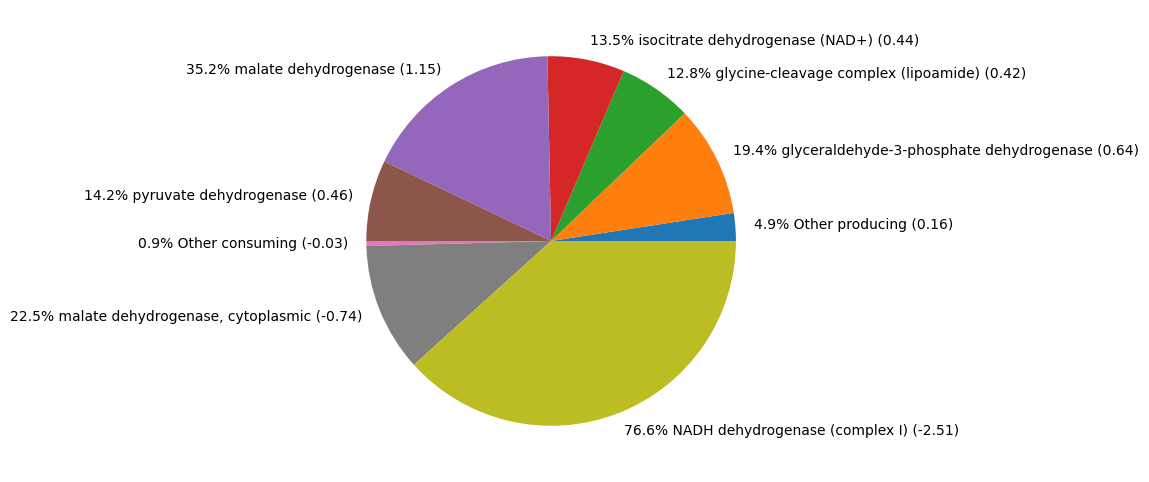

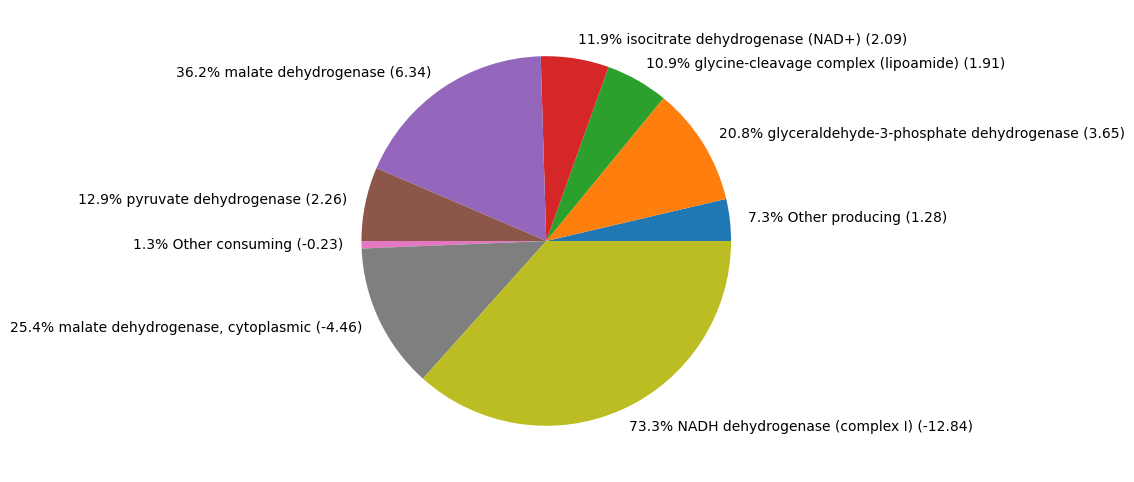

In [ ]:
nadh_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_nm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_nm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4 

SUM produced: 8.8158197588815, SUM consumed: -8.815819758881785
SUM produced: 45.62783114879084, SUM consumed: -45.62783114879081


([<matplotlib.patches.Wedge at 0x1cce67f65d0>,
 [Text(1.0970751705137183, 0.08016277341943871, '4.6% Other producing (2.12)'),
  Text(0.18313200237457777, 1.0846486388256236, '80.1% ATP synthase (36.53)'),
  Text(-1.0314921798584031, 0.38213071440406376, '8.0% phosphoglycerate kinase (3.65)'),
  Text(-1.0927864767486533, 0.12576850255634392, '7.3% pyruvate kinase (3.33)'),
  Text(-1.0678422696850343, -0.264031981157425, '15.4% Other consuming (-7.04)'),
  Text(-0.9131077520824233, -0.6133793549566076, '6.8% hexokinase (D-glucose:ATP) (-3.1)'),
  Text(0.2532548778429816, -1.0704494228354446, '70.3% biomass pseudoreaction (-32.09)'),
  Text(1.0925051127025784, -0.12818962016765126, '7.4% non-growth associated maintenance reaction (-3.39)')])

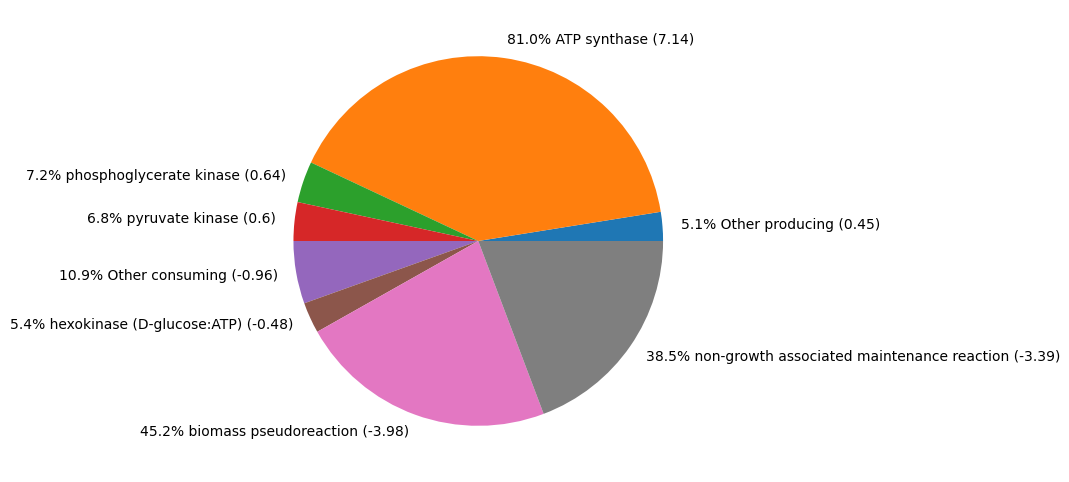

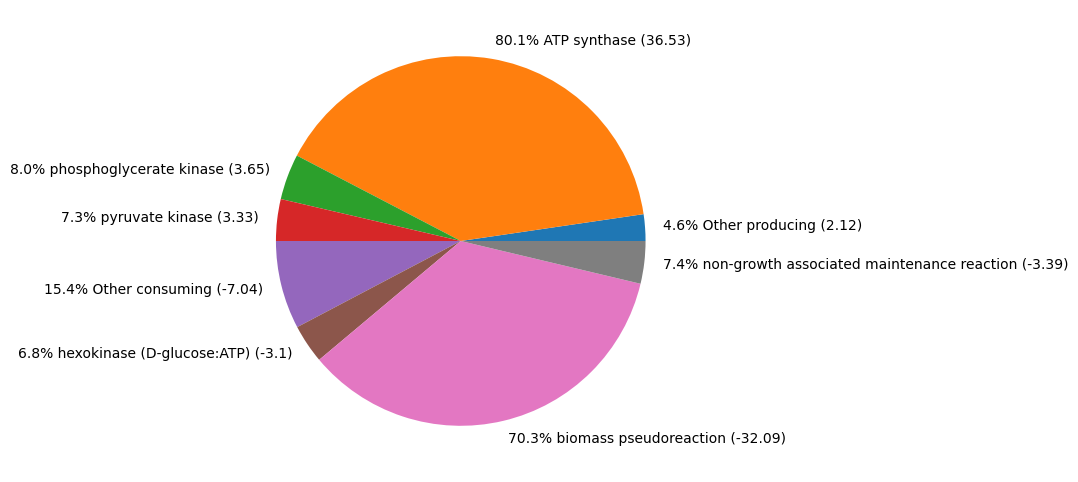

In [ ]:
atp_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_nm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\rhtoGEM_nm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [ ]:
# import pickle

# with open("../cofactor_comparison/rhtoGEM_cofactors.pk", "wb") as f:
#     pickle.dump([nadph_fluxes_lowest_GR, nadph_fluxes_highest_GR, nadh_fluxes_lowest_GR, nadh_fluxes_highest_GR, atp_fluxes_lowest_GR, atp_fluxes_highest_GR], f)

In [ ]:
# # Get json file
# filename = f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\NP11\\NP11json.json'
# cobra.io.save_json_model(model1, filename, pretty=False)

In [ ]:
# # Get cofactor data to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\NP11\\NP11_cofactor_fluxes_nm.xlsx') as excel_writer:
#     nadph_fluxes_0.to_excel(excel_writer, sheet_name=f'NADPH fluxes, GR = {growth_rates[0]}', index=False)
#     nadph_fluxes_4.to_excel(excel_writer, sheet_name=f'NADPH fluxes, GR = {growth_rates[5]}', index=False)
#     nadh_fluxes_0.to_excel(excel_writer, sheet_name=f'NADH fluxes, GR = {growth_rates[0]}', index=False)
#     nadh_fluxes_4.to_excel(excel_writer, sheet_name=f'NADH fluxes, GR = {growth_rates[5]}', index=False)
#     atp_fluxes_0.to_excel(excel_writer, sheet_name=f'ATP fluxes, GR = {growth_rates[0]}', index=False)
#     atp_fluxes_4.to_excel(excel_writer, sheet_name=f'ATP fluxes, GR = {growth_rates[5]}', index=False)